In [4]:
from google.colab import files
uploaded = files.upload()


Saving news_preview_mob_image__preview_404.jpg to news_preview_mob_image__preview_404.jpg


Saving news_preview_mob_image__preview_404.jpg to news_preview_mob_image__preview_404 (1).jpg
Found 4 Faces!


/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


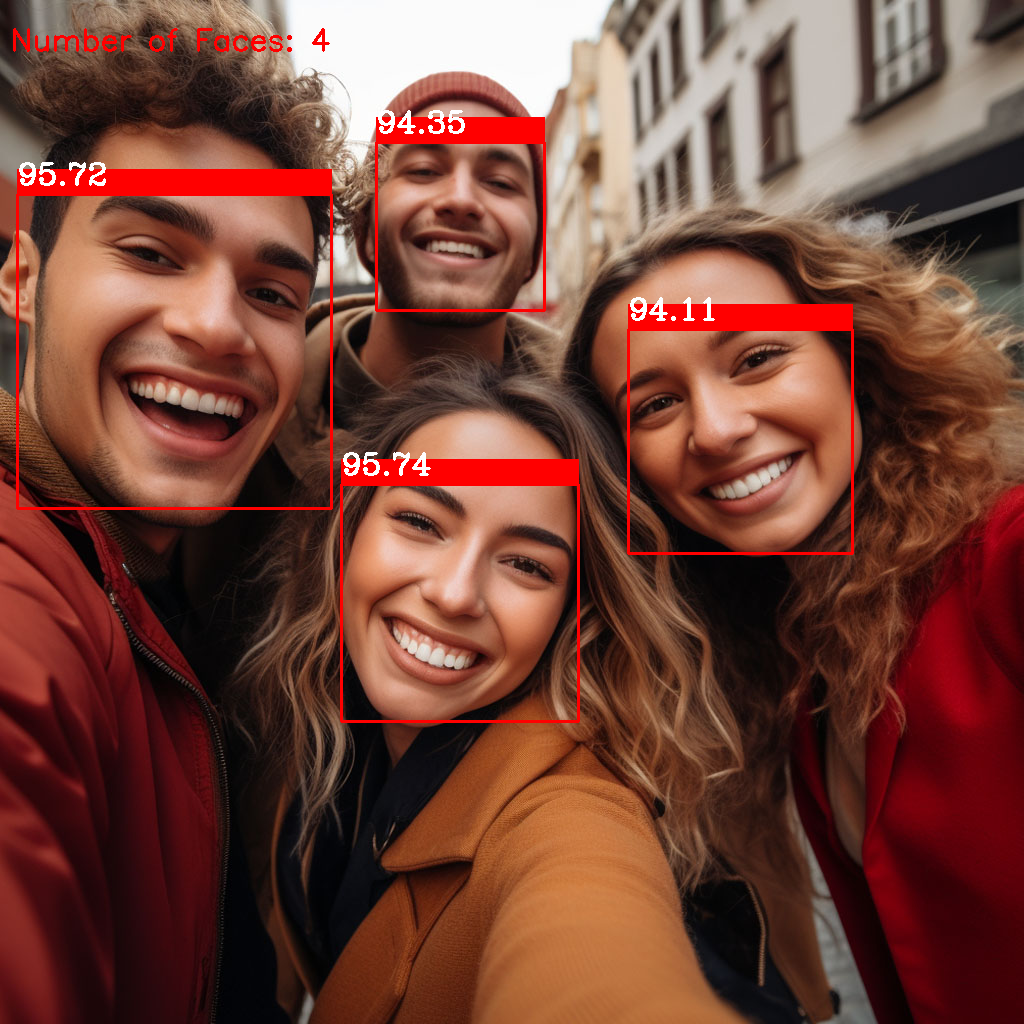

In [ ]:
import cv2
import mediapipe as mp
from google.colab.patches import cv2_imshow
from google.colab import files

# Define mediapipe Face detector
face_detection = mp.solutions.face_detection.FaceDetection(0.6)

# Upload image and video files
uploaded = files.upload()

# Get the uploaded image path (assuming only one image is uploaded)
image_path = list(uploaded.keys())[0]
img = cv2.imread(image_path)

# Check if the image was loaded correctly
if img is None:
    raise FileNotFoundError(f"Image file '{image_path}' not found or could not be read.")

# Detection function
def detector(frame):
    count = 0
    height, width, channel = frame.shape

    # Convert frame BGR to RGB colorspace
    imgRGB = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    # Detect results from the frame
    result = face_detection.process(imgRGB)

    # Extract information from the result
    if result.detections:
        for detection in result.detections:
            # Extract Score and bounding box information
            score = detection.score
            box = detection.location_data.relative_bounding_box

            x, y, w, h = int(box.xmin * width), int(box.ymin * height), int(box.width * width), int(box.height * height)
            score = str(round(score[0] * 100, 2))

            # Draw rectangles
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 2)
            cv2.rectangle(frame, (x, y), (x + w, y - 25), (0, 0, 255), -1)

            cv2.putText(frame, score, (x, y - 10), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 255, 255), 2)

        count = len(result.detections)
        print("Found", count, "Faces!")

    return count, frame

# Detect from an image file
count, output = detector(img)
cv2.putText(output, "Number of Faces: " + str(count), (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
cv2_imshow(output)

# Upload and process a video file
uploaded_video = files.upload()

# Get the uploaded video path (assuming only one video is uploaded)
video_path = list(uploaded_video.keys())[0]
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    raise FileNotFoundError(f"Video file '{video_path}' not found or could not be opened.")

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    count, output = detector(frame)
    cv2.putText(output, "Number of Faces: " + str(count), (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
    cv2_imshow(output)
    if cv2.waitKey(15) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
